# Фруктин Артём РТ5-61Б

# Прогнозирование производительности студентов

В данном проекте мы будем использовать набор данных о показателях студентов, доступный по ссылке: [Kaggle Student Performance Dataset](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

Этот проект может оценить свою производительность и выявить ключевые факторы, влияющие на этот процесс.

## Описание датасета

Датасет включает один файл `Student_Performance.csv` с такими колонками:

- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day.
- Sample Question Papers Practiced: The number of sample question papers the student practiced.


## Цель задачи

Цель данной задачи регрессии — предсказать значение производительности (`Performance Index`) на основе предоставленных признаков.


### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline 
sns.set(style="ticks")

### Загрузка данных
Загрузим файлы датасета в помощью библиотеки Pandas.

In [2]:
data = pd.read_csv('data/Student_Performance.csv')

In [3]:
# Удалим дубликаты записей, если они присутствуют
data = data.drop_duplicates()

### Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

- **Основные характеристики датасета**

In [4]:
# Первые 5 строк датасета
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
# Размер  датасета - 9873 строк, 13 колонок
data.shape

(9873, 6)

In [6]:
# Список колонок
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [7]:
# Список колонок с типами данных 
data.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [8]:
# Проверим наличие пустых значений
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

**Вывод**: представленный набор данных не содержит пропусков.



In [9]:
label_encoder = LabelEncoder()
data['Extracurricular Activities'] = label_encoder.fit_transform(data['Extracurricular Activities'])
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


- **Построение графиков для понимания структуры данных**

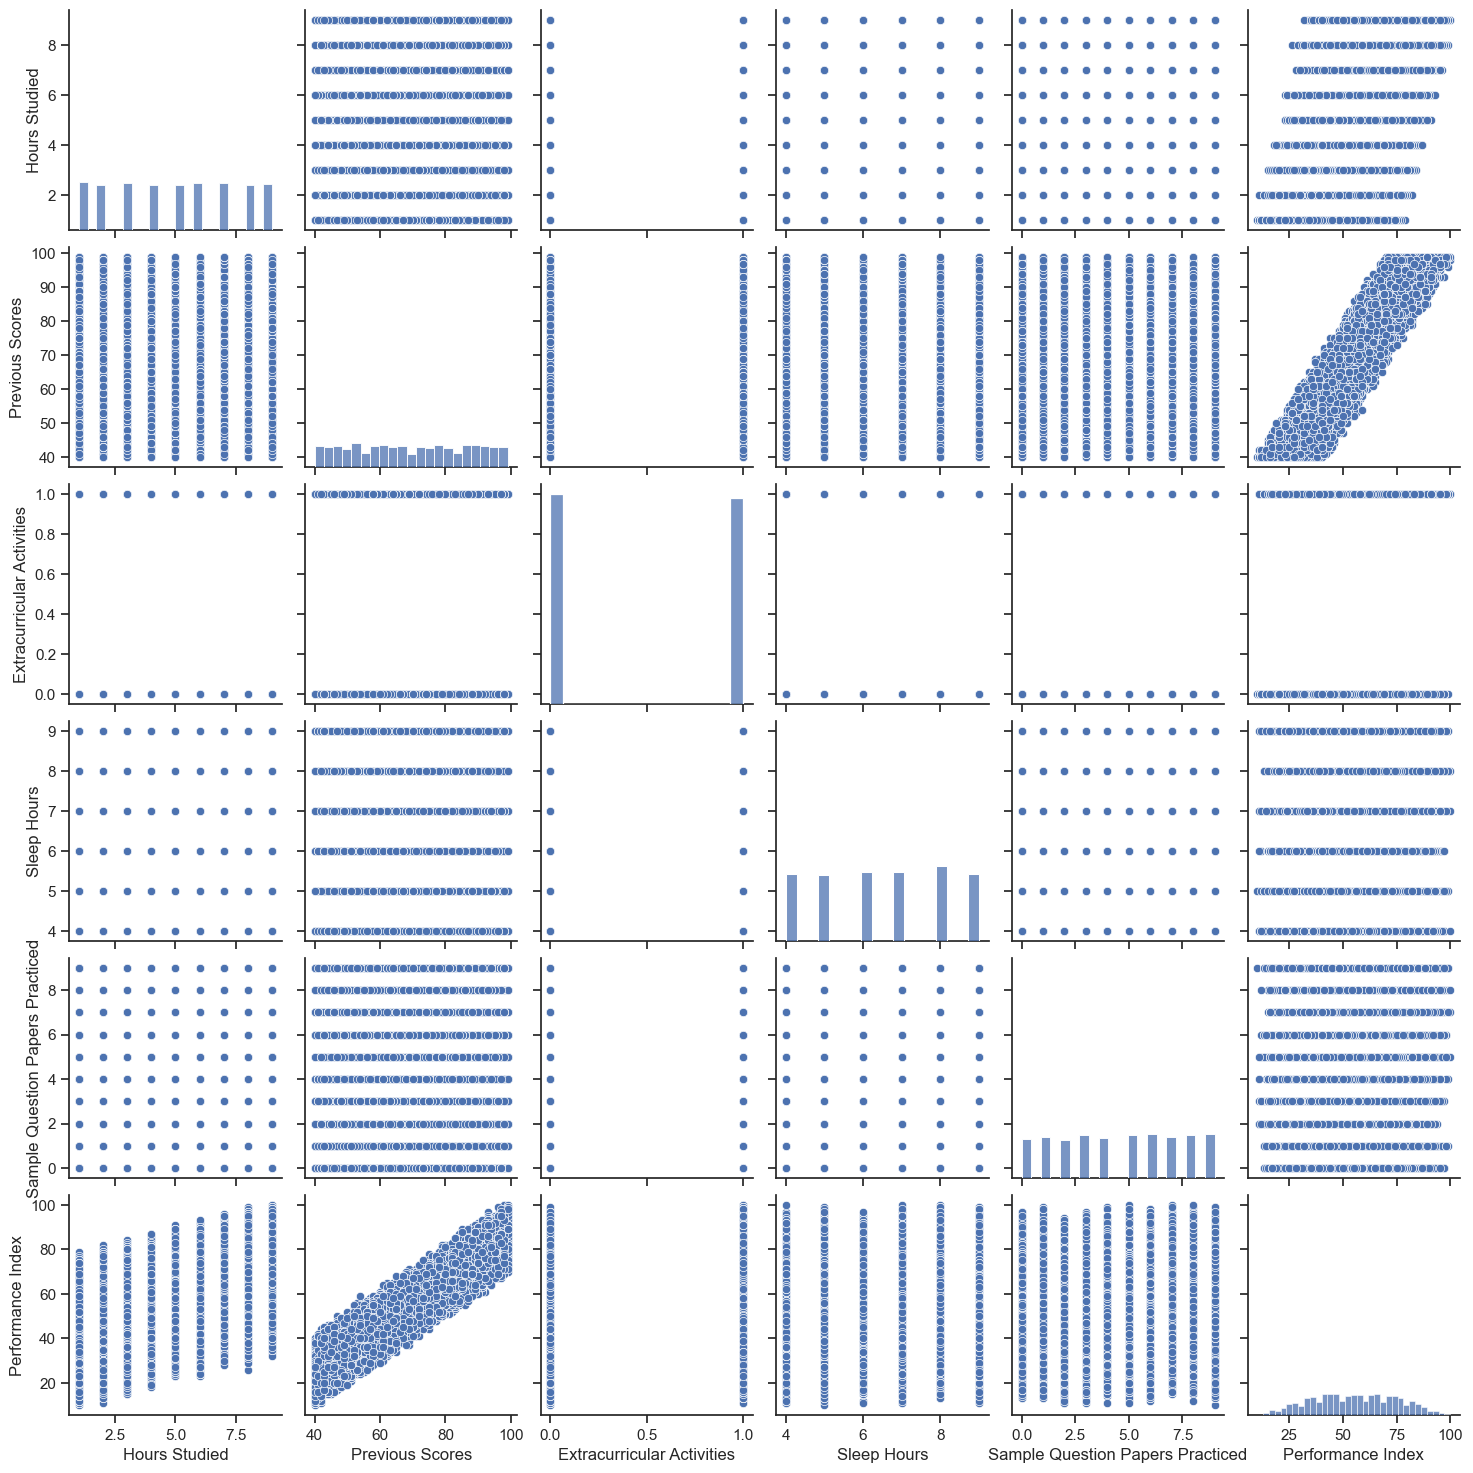

In [10]:
# Парные диаграммы
sns.pairplot(data)

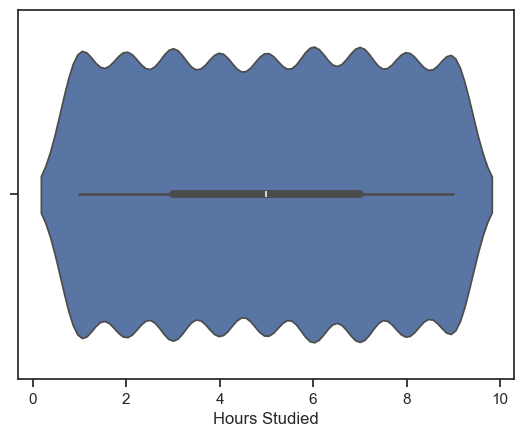

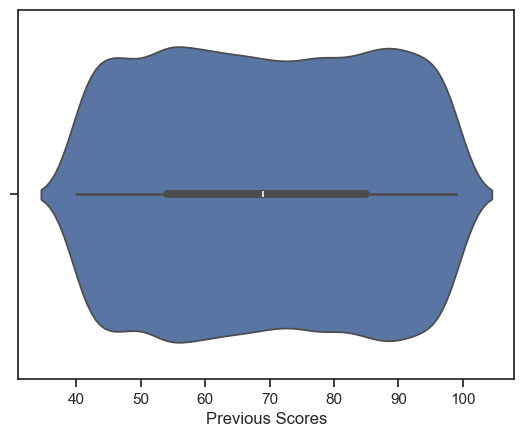

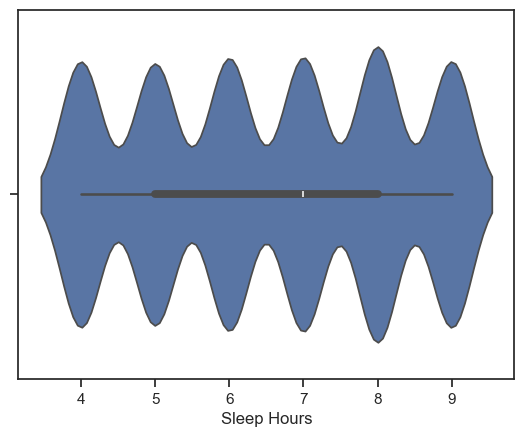

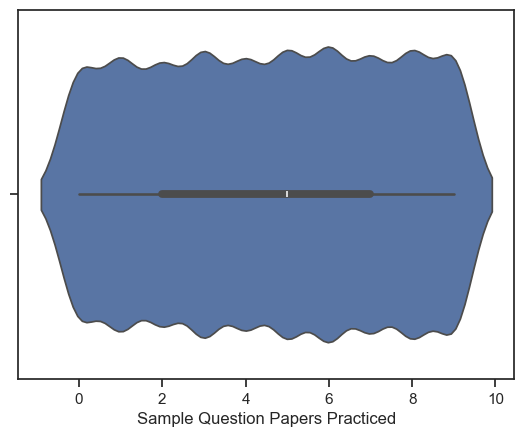

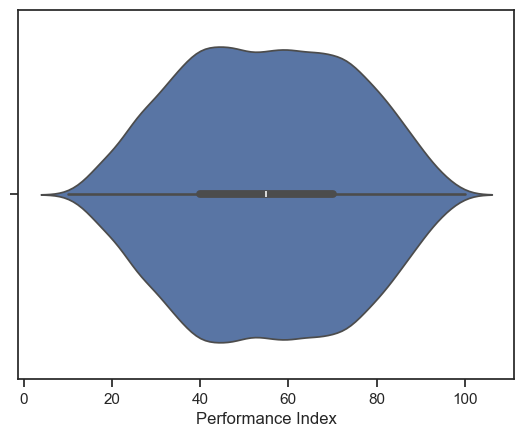

In [11]:
# Скрипичные диаграммы для числовых колонок
for col in ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']:
    sns.violinplot(x=data[col])
    plt.show()

### Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей

Для построения моделей будем использовать все признаки

Категориальные признаки присутствуют, однако их кодирования не требуется.

Вспомогательные признаки для улучшения качества моделей в данном примере мы строить не будем.
Выполним масштабирование данных. 

In [12]:
# Числовые колонки для масштабирования
scale_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

In [13]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [14]:

scaled_data = np.log1p(data['Hours Studied'])


In [15]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]
data['Hours Studied_scaled'] = scaled_data

In [16]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Hours Studied_scaled,Previous Scores_scaled,Sleep Hours_scaled,Sample Question Papers Practiced_scaled,Performance Index_scaled
0,7,99,1,9,1,91.0,2.079442,1.000000,1.0,0.111111,0.900000
1,4,82,0,4,2,65.0,1.609438,0.711864,0.0,0.222222,0.611111
2,8,51,1,7,2,45.0,2.197225,0.186441,0.6,0.222222,0.388889
3,5,52,1,5,2,36.0,1.791759,0.203390,0.2,0.222222,0.288889
4,7,75,0,8,5,66.0,2.079442,0.593220,0.8,0.555556,0.622222


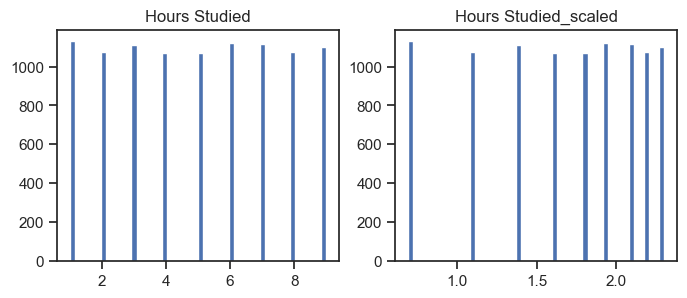

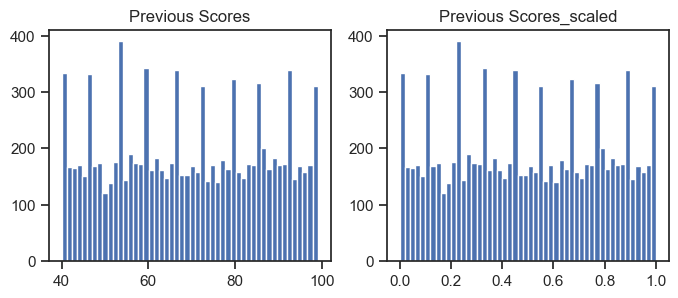

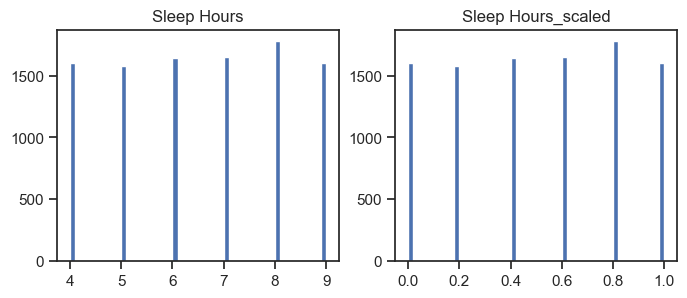

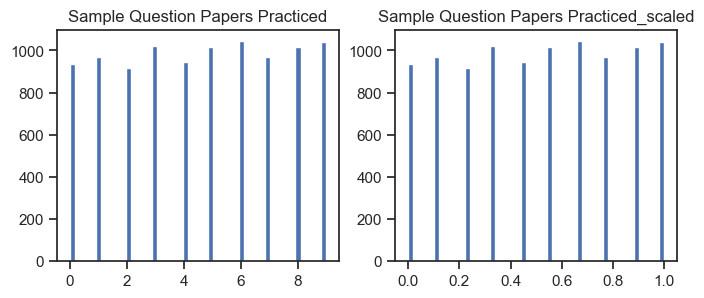

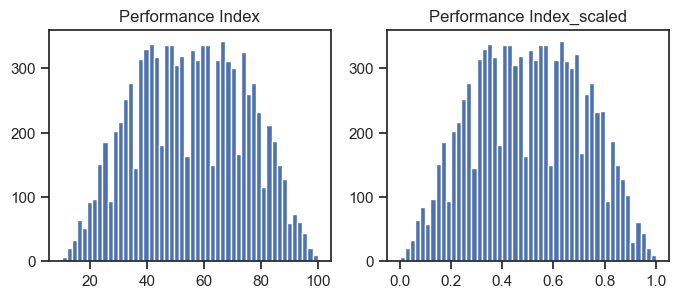

In [17]:
# Проверим, что масштабирование не повлияло на распределение данных
scale_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

### Зависимость успеваемости от часов сна

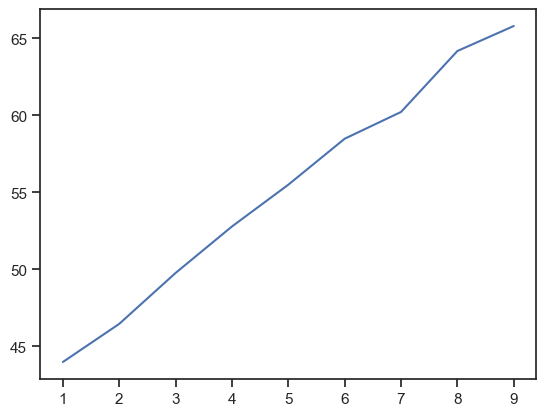

In [18]:
avg_performance_by_hours = data.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.show()

### Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [19]:
print(data.columns)


Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index',
       'Hours Studied_scaled', 'Previous Scores_scaled', 'Sleep Hours_scaled',
       'Sample Question Papers Practiced_scaled', 'Performance Index_scaled'],
      dtype='object')


In [20]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]

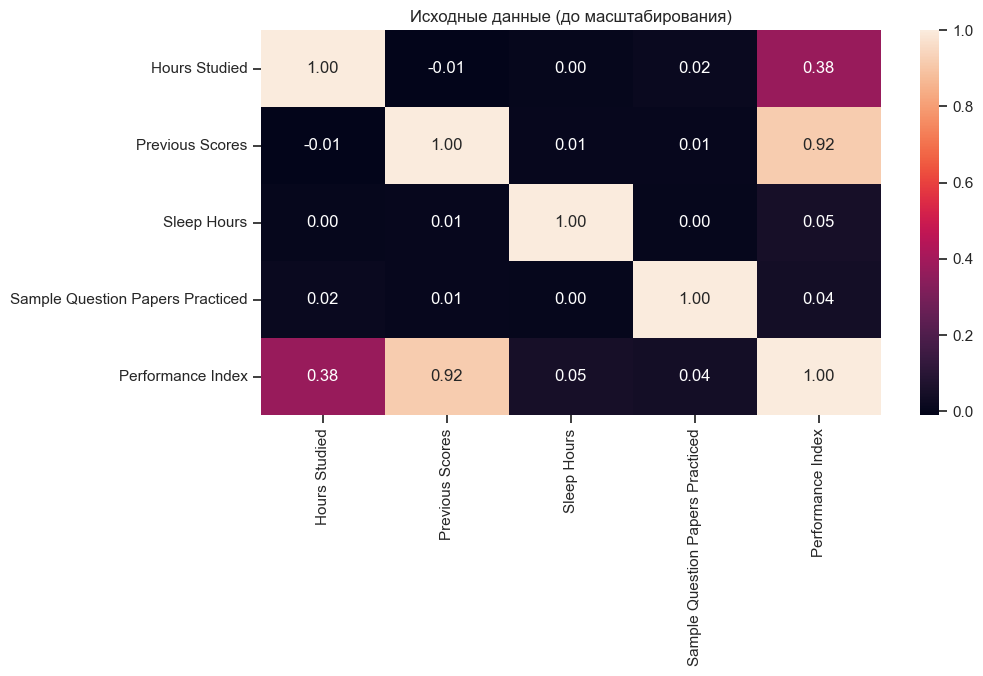

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[scale_cols].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

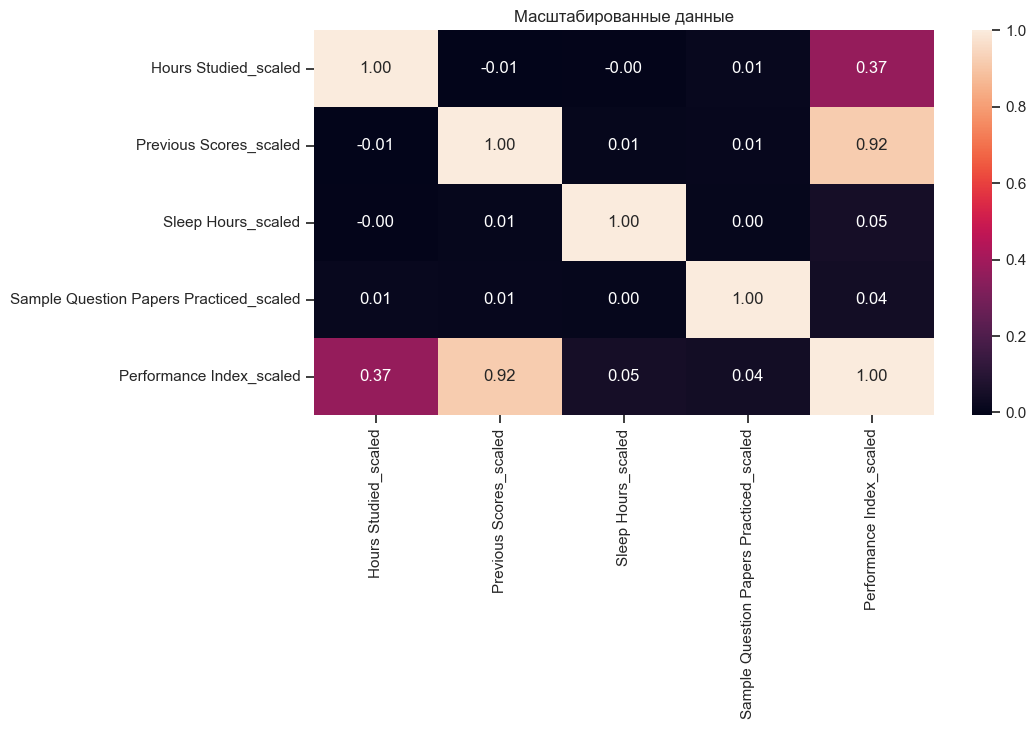

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[scale_cols_postfix].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()


#### На основе корреляционной матрицы можно сделать следующие выводы:

- Корреляционные матрицы для исходных и масштабированных данных совпадают.
- Целевой признак классификации "Performance Index" наиболее сильно коррелирует с Previous Score (0.92) и Hourse Studied (0.37). И они не коррелируют между собой
- Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком. На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

### Выбор метрик для последующей оценки качества моделей:
- Mean absolute error - средняя абсолютная ошибка
- Mean squared error - средняя квадратичная ошибка
- R2 - коэффициент детерминации

**MAE** и **MSE** взяты так как важна направленность ошибки, **R2** так как важно, насколько хорошо модель объясняет вариацию в данных

### Выбор моделей:
- Линейная регрессия
- Метод ближайших соседей
- Методопорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

In [23]:
# На основе масштабированных данных выделим обучающую и тестовую выборки
# Создаем словарь с ключами и значениями для DataFrame
data_dict = {"Previous Scores_scaled": data['Previous Scores_scaled'], "Hours Studied_scaled": data['Hours Studied_scaled']}

# Создаем DataFrame из словаря
df_scaled = pd.DataFrame(data_dict)

# Теперь, когда у нас есть DataFrame с масштабированными данными, мы можем разделить его на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df_scaled, data['Performance Index_scaled'], random_state=1)


In [24]:
#размеры выборок
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7404, 2), (7404,), (2469, 2), (2469,))

### Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.


In [25]:
# Модели
regr_models = {'LR': LinearRegression(), 
               'KNN_5':KNeighborsRegressor(n_neighbors=5),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [26]:
# from torchmetrics import MetricLogger
# # Сохранение метрик
# regrMetricLogger = MetricLogger()
regrMetricLogger = pd.DataFrame(columns=['ModelName', 'MetricName', 'Value'])


In [27]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, Y_pred)
    mse = mean_squared_error(y_test, Y_pred)
    r2 = r2_score(y_test, Y_pred)

    regrMetricLogger.loc[len(regrMetricLogger)] = [model_name, 'MAE', mae]
    regrMetricLogger.loc[len(regrMetricLogger)] = [model_name, 'MSE', mse]
    regrMetricLogger.loc[len(regrMetricLogger)] = [model_name, 'R2', r2]
   
    print('{} \t MAE={}, MSE={}, R2={}'.format(
        model_name, round(mae, 3), round(mse, 3), round(r2, 3)))

In [28]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

LR 	 MAE=0.026, MSE=0.001, R2=0.978
KNN_5 	 MAE=0.022, MSE=0.001, R2=0.984
SVR 	 MAE=0.024, MSE=0.001, R2=0.98
Tree 	 MAE=0.021, MSE=0.001, R2=0.985
RF 	 MAE=0.021, MSE=0.001, R2=0.985
GB 	 MAE=0.02, MSE=0.001, R2=0.985


### Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [29]:
n_range = np.array(range(1,100,10))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])}]

In [30]:
%%time
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(X_train, y_train)

CPU times: total: 1.86 s
Wall time: 2.03 s


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])}],
             scoring='neg_mean_squared_error')

In [31]:
# Лучшая модель
regr_gs.best_estimator_

KNeighborsRegressor(n_neighbors=31)

In [32]:
# Лучшее значение параметров
regr_gs.best_params_

{'n_neighbors': 31}

In [33]:
regr_gs_best_params_txt = str(regr_gs.best_params_['n_neighbors'])
regr_gs_best_params_txt

'31'

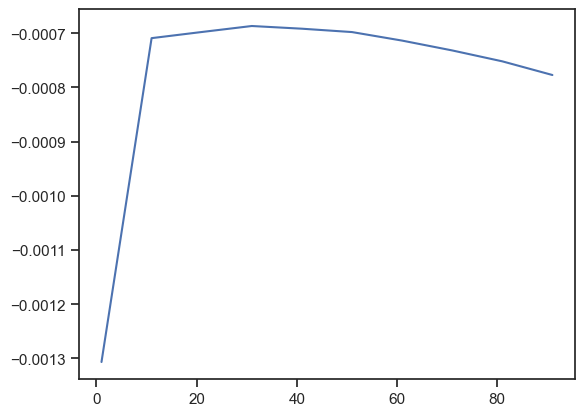

In [34]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

### Построение моделей с учетом подбора гиперпараметра. Сравнение качества полученных моделей с качеством baseline-моделей.

In [35]:
regr_models_grid = {'KNN_5':KNeighborsRegressor(n_neighbors=5), 
                    str('KNN_'+regr_gs_best_params_txt):regr_gs.best_estimator_}

In [36]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

KNN_5 	 MAE=0.022, MSE=0.001, R2=0.984
KNN_31 	 MAE=0.021, MSE=0.001, R2=0.985


### Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

In [37]:
# Метрики качества модели
regr_metrics = regrMetricLogger['MetricName'].unique()
regr_metrics

array(['MAE', 'MSE', 'R2'], dtype=object)

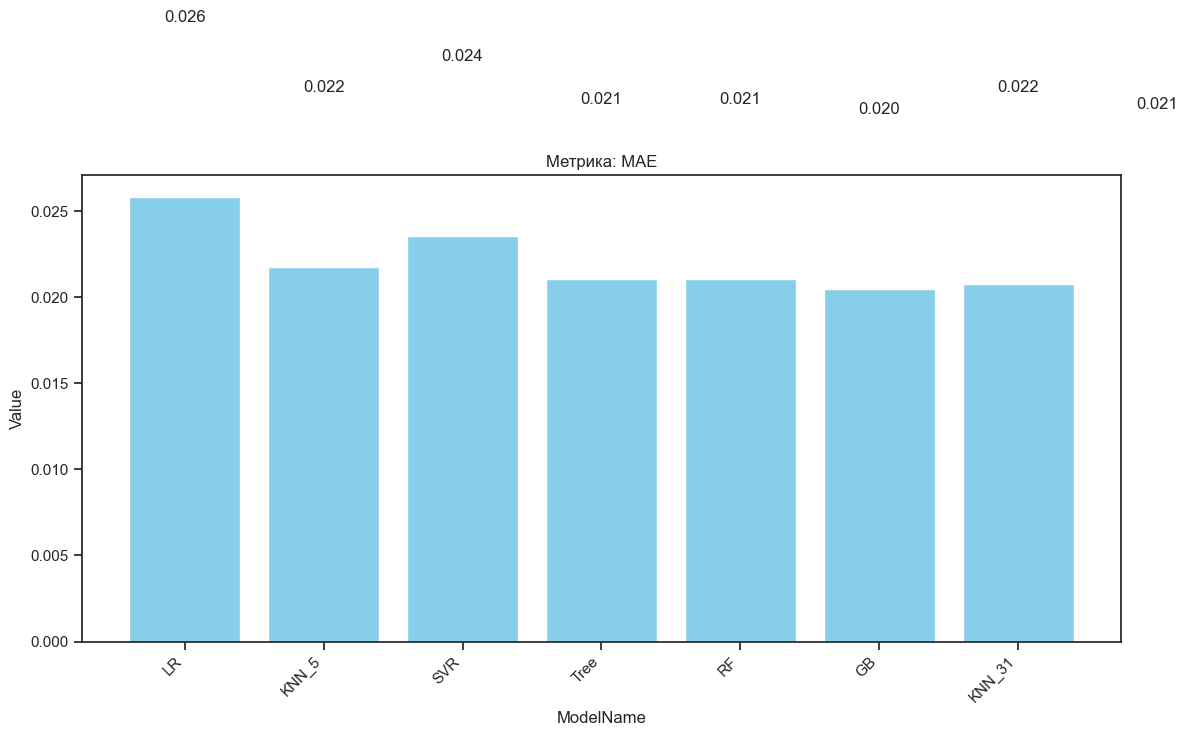

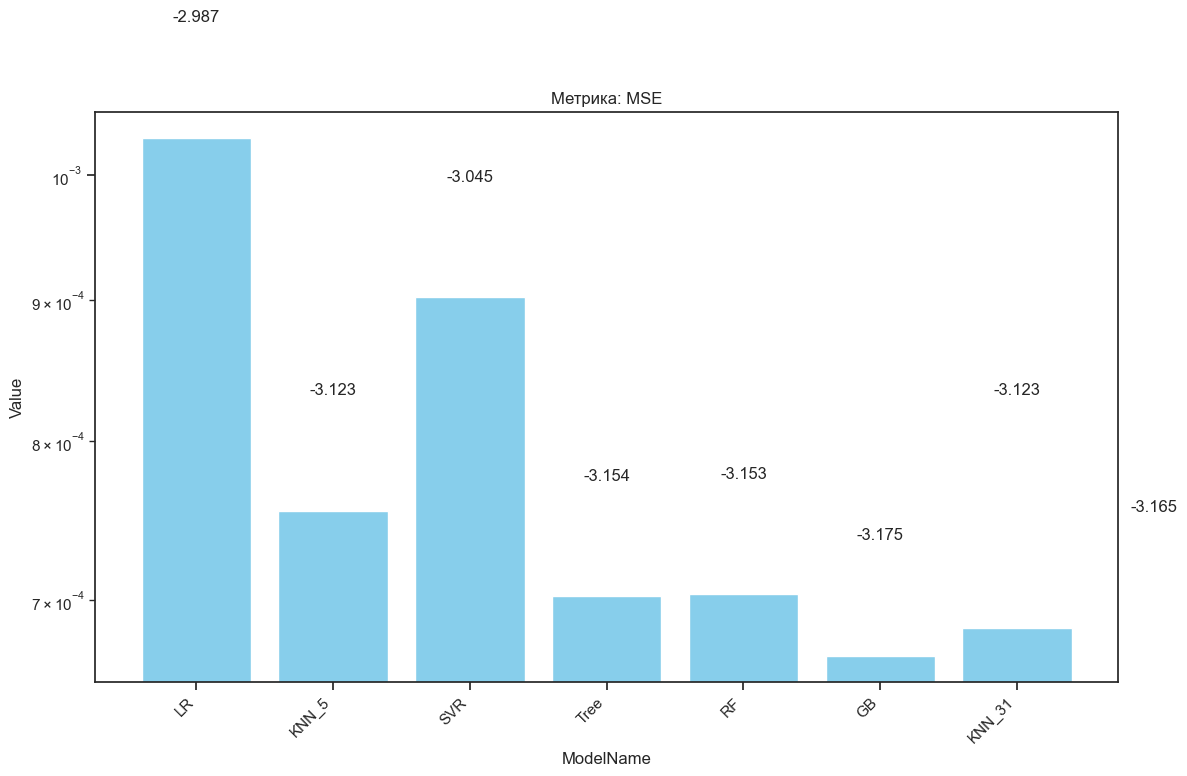

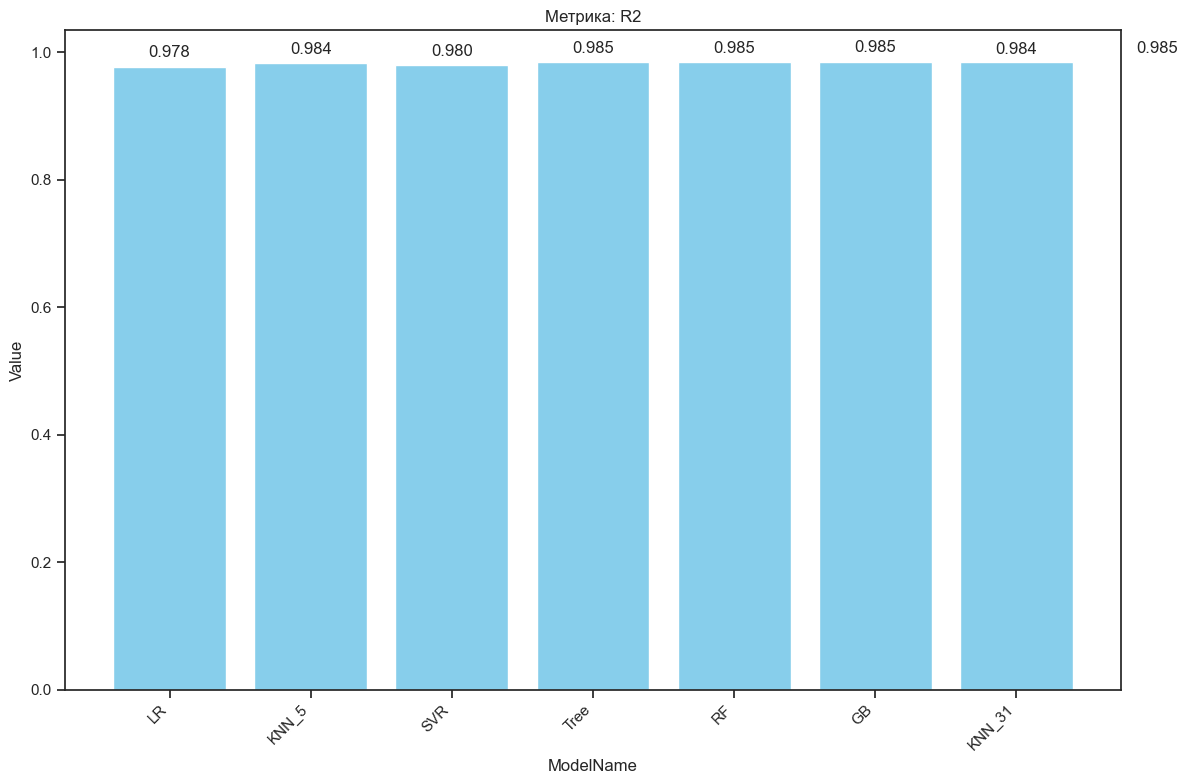

In [38]:
import matplotlib.pyplot as plt

def plot_metric(regrMetricLogger, metric_name):
    # Фильтрация DataFrame для отображения только интересующей метрики
    filtered_df = regrMetricLogger[regrMetricLogger['MetricName'] == metric_name][['ModelName', 'Value']]
    
    # Создание столбчатой диаграммы
    plt.figure(figsize=(12, 8))
    plt.bar(filtered_df['ModelName'], filtered_df['Value'], color='skyblue')
    
    # Добавление подписей к столбцам
    for i, value in enumerate(filtered_df['Value']):
        if metric_name == 'MSE':
            log_value = np.log10(value)
            plt.text(i, value * 1.1, f'{log_value:.3f}', ha='center', va='bottom')
        else:
            plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom')
    
    plt.xlabel('ModelName')
    plt.ylabel('Value')
    plt.title(f'Метрика: {metric_name}')
    plt.xticks(rotation=45, ha='right')

    if metric_name == 'MSE':
        plt.yscale('log')
        
    plt.tight_layout()
    plt.show()

# Пример использования функции для каждой из метрик
metrics = ['MAE', 'MSE', 'R2']
for metric in metrics:
    plot_metric(regrMetricLogger, metric)
